## Cell 1: Setup Proyek dan Impor Library

In [1]:
# ==============================================================================
# SEL 1: SETUP DAN IMPOR LIBRARY
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from PIL import Image
from IPython.display import display

# Mengatur style visualisasi agar lebih menarik
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
print("✅ Library berhasil diimpor.")

✅ Library berhasil diimpor.


## Cell 2: Memuat Dataset Mentah

In [3]:
# ==============================================================================
# SEL 2: MEMUAT DATASET MENTAH
# ==============================================================================
# Tentukan path utama ke folder dataset
BASE_PATH = "../dataset/"

# Definisikan path untuk setiap file CSV dan folder gambar
train_truth_path = os.path.join(BASE_PATH, "MILK10k_Training_GroundTruth.csv")
test_meta_path = os.path.join(BASE_PATH, "MILK10k_Test_Metadata.csv")
train_img_path = os.path.join(BASE_PATH, "MILK10k_Training_Input")
test_img_path = os.path.join(BASE_PATH, "MILK10k_Test_Input")

# Memuat data CSV
try:
    df_train_truth = pd.read_csv(train_truth_path)
    df_test_meta = pd.read_csv(test_meta_path)
    print("✅ Data mentah berhasil dimuat.")

    # PENTING: Memastikan tipe data kolom diagnosis adalah angka (float)
    # untuk menghindari error perhitungan di sel berikutnya.
    diagnosis_columns = ['AKIEC', 'BCC', 'BEN_OTH', 'BKL', 'DF', 'INF', 'MAL_OTH', 'MEL', 'NV', 'SCCKA', 'VASC']
    df_train_truth[diagnosis_columns] = df_train_truth[diagnosis_columns].astype(float)
    print("✅ Tipe data kolom diagnosis telah dipastikan numerik.")
    
except FileNotFoundError as e:
    print(f"❌ ERROR: File tidak ditemukan. Pastikan file CSV ada di folder 'dataset'.")
    print(f"   Detail: {e}")

✅ Data mentah berhasil dimuat.
✅ Tipe data kolom diagnosis telah dipastikan numerik.


## Cell 3: Analisis dan Verifikasi Data Awal

In [4]:
# ==============================================================================
# SEL 3: ANALISIS DAN VERIFIKASI DATA AWAL
# ==============================================================================
print("--- Info Data Ground Truth Training ---")
display(df_train_truth.head())
print("\n--- Info Data Metadata Test ---")
display(df_test_meta.head())

# Verifikasi Rasio Pembagian Dataset
num_train_lesions = df_train_truth['lesion_id'].nunique()
num_test_lesions = df_test_meta['lesion_id'].nunique()
total_lesions = num_train_lesions + num_test_lesions
train_ratio = (num_train_lesions / total_lesions) * 100
test_ratio = (num_test_lesions / total_lesions) * 100

print("\n--- Analisis Rasio Pembagian Dataset ---")
print(f"Total Lesi Unik      : {total_lesions}")
print(f"Jumlah Lesi Training   : {num_train_lesions} ({train_ratio:.2f}%)")
print(f"Jumlah Lesi Testing    : {num_test_lesions} ({test_ratio:.2f}%)")

--- Info Data Ground Truth Training ---


,lesion_id,AKIEC,BCC,BEN_OTH,BKL,DF,INF,MAL_OTH,MEL,NV,SCCKA,VASC
0,IL_0000652,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IL_0003176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IL_0004688,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IL_0005081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IL_0006177,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



--- Info Data Metadata Test ---


,lesion_id,image_type,isic_id,attribution,copyright_license,image_manipulation,age_approx,sex,skin_tone_class,site,MONET_ulceration_crust,MONET_hair,MONET_vasculature_vessels,MONET_erythema,MONET_pigmented,MONET_gel_water_drop_fluid_dermoscopy_liquid,MONET_skin_markings_pen_ink_purple_pen
0,IL_0006205,clinical: close-up,ISIC_9611969,MILK study team,CC-BY-NC,instrument only,70,male,3,head_neck_face,0.578426,0.064042,0.027816,0.512865,0.103044,0.115926,0.031519
1,IL_0006205,dermoscopic,ISIC_5027091,MILK study team,CC-BY-NC,instrument only,70,male,3,head_neck_face,0.827649,0.123560,0.125765,0.592175,0.086189,0.145904,0.030197
2,IL_0025400,clinical: close-up,ISIC_1495855,MILK study team,CC-BY-NC,instrument only,45,female,3,upper_extremity,0.194706,0.176053,0.011349,0.808373,0.120410,0.135312,0.088793
3,IL_0025400,dermoscopic,ISIC_8946341,MILK study team,CC-BY-NC,instrument only,45,female,3,upper_extremity,0.196710,0.402491,0.137548,0.570068,0.266160,0.314894,0.110716
4,IL_0039001,clinical: close-up,ISIC_2986577,MILK study team,CC-BY-NC,instrument only,60,female,4,NaN,0.105831,0.171700,0.020386,0.832385,0.191900,0.163525,0.369340



--- Analisis Rasio Pembagian Dataset ---
Total Lesi Unik      : 5719
Jumlah Lesi Training   : 5240 (91.62%)
Jumlah Lesi Testing    : 479 (8.38%)


## Cell 4: Transformasi Data (Menggabungkan Path Gambar)

In [5]:
# ==============================================================================
# SEL 4: TRANSFORMASI DATA (MENGGABUNGKAN PATH GAMBAR)
# ==============================================================================

# --- 4.1 Transformasi Data Training ---
print("Memproses data training...")
# Membuat daftar semua path gambar di folder training
all_train_images = glob.glob(os.path.join(train_img_path, '*', '*.jpg'))
path_data = []
for path in all_train_images:
    parts = path.replace('\\', '/').split('/')
    lesion_id, filename = parts[-2], parts[-1]
    path_data.append({'lesion_id': lesion_id, 'image_path': path})

df_train_paths = pd.DataFrame(path_data)

# Mengelompokkan berdasarkan lesion_id dan membuat list berisi 2 path gambar
df_train_pivot = df_train_paths.groupby('lesion_id')['image_path'].apply(list).reset_index()

# Menggabungkan dengan tabel ground truth
df_train_processed = pd.merge(df_train_truth, df_train_pivot, on='lesion_id')

# Memisahkan list path menjadi dua kolom terpisah
# Ini adalah langkah kunci untuk menangani 2 gambar per lesi
try:
    df_train_processed[['image_path_1', 'image_path_2']] = pd.DataFrame(df_train_processed['image_path'].tolist(), index=df_train_processed.index)
    df_train_processed = df_train_processed.drop(columns=['image_path'])
    print("✅ Transformasi data training selesai.")
except ValueError:
    print("⚠️ Peringatan: Beberapa lesi training tidak memiliki pasangan gambar yang lengkap.")


# --- 4.2 Transformasi Data Test ---
print("\nMemproses data test...")
df_test_meta['image_path'] = df_test_meta.apply(lambda r: os.path.join(test_img_path, r['lesion_id'], r['isic_id'] + '.jpg'), axis=1)
df_test_clinical = df_test_meta[df_test_meta['image_type'] == 'clinical: close-up'].rename(columns={'image_path': 'clinical_path', 'isic_id': 'clinical_isic_id'})
df_test_dermoscopic = df_test_meta[df_test_meta['image_type'] == 'dermoscopic'].rename(columns={'image_path': 'dermoscopic_path', 'isic_id': 'dermoscopic_isic_id'})

# Menggabungkan kembali menjadi satu baris per lesi
df_test_processed = pd.merge(
    df_test_clinical.drop(columns=['image_type']),
    df_test_dermoscopic[['lesion_id', 'dermoscopic_path', 'dermoscopic_isic_id']],
    on='lesion_id'
)
print("✅ Transformasi data test selesai.")

# --- Tampilkan Hasil Transformasi ---
print("\n--- Contoh Tabel Training SETELAH Transformasi ---")
display(df_train_processed.head())

print("\n--- Contoh Tabel Test SETELAH Transformasi ---")
display(df_test_processed.head())

Memproses data training...
✅ Transformasi data training selesai.

Memproses data test...
✅ Transformasi data test selesai.

--- Contoh Tabel Training SETELAH Transformasi ---


,lesion_id,AKIEC,BCC,BEN_OTH,BKL,DF,INF,MAL_OTH,MEL,NV,SCCKA,VASC,image_path_1,image_path_2
0,IL_0000652,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../dataset/MILK10k_Training_Input/IL_0000652/I...,../dataset/MILK10k_Training_Input/IL_0000652/I...
1,IL_0003176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../dataset/MILK10k_Training_Input/IL_0003176/I...,../dataset/MILK10k_Training_Input/IL_0003176/I...
2,IL_0004688,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../dataset/MILK10k_Training_Input/IL_0004688/I...,../dataset/MILK10k_Training_Input/IL_0004688/I...
3,IL_0005081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,../dataset/MILK10k_Training_Input/IL_0005081/I...,../dataset/MILK10k_Training_Input/IL_0005081/I...
4,IL_0006177,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../dataset/MILK10k_Training_Input/IL_0006177/I...,../dataset/MILK10k_Training_Input/IL_0006177/I...



--- Contoh Tabel Test SETELAH Transformasi ---


,lesion_id,clinical_isic_id,attribution,copyright_license,image_manipulation,age_approx,sex,skin_tone_class,site,MONET_ulceration_crust,MONET_hair,MONET_vasculature_vessels,MONET_erythema,MONET_pigmented,MONET_gel_water_drop_fluid_dermoscopy_liquid,MONET_skin_markings_pen_ink_purple_pen,clinical_path,dermoscopic_path,dermoscopic_isic_id
0,IL_0006205,ISIC_9611969,MILK study team,CC-BY-NC,instrument only,70,male,3,head_neck_face,0.578426,0.064042,0.027816,0.512865,0.103044,0.115926,0.031519,../dataset/MILK10k_Test_Input/IL_0006205/ISIC_...,../dataset/MILK10k_Test_Input/IL_0006205/ISIC_...,ISIC_5027091
1,IL_0025400,ISIC_1495855,MILK study team,CC-BY-NC,instrument only,45,female,3,upper_extremity,0.194706,0.176053,0.011349,0.808373,0.120410,0.135312,0.088793,../dataset/MILK10k_Test_Input/IL_0025400/ISIC_...,../dataset/MILK10k_Test_Input/IL_0025400/ISIC_...,ISIC_8946341
2,IL_0039001,ISIC_2986577,MILK study team,CC-BY-NC,instrument only,60,female,4,NaN,0.105831,0.171700,0.020386,0.832385,0.191900,0.163525,0.369340,../dataset/MILK10k_Test_Input/IL_0039001/ISIC_...,../dataset/MILK10k_Test_Input/IL_0039001/ISIC_...,ISIC_1075872
3,IL_0046799,ISIC_4990827,MILK study team,CC-BY-NC,instrument only,60,female,3,upper_extremity,0.838776,0.090061,0.021409,0.369859,0.054896,0.223515,0.057886,../dataset/MILK10k_Test_Input/IL_0046799/ISIC_...,../dataset/MILK10k_Test_Input/IL_0046799/ISIC_...,ISIC_7547928
4,IL_0054262,ISIC_7249617,MILK study team,CC-BY-NC,instrument only,40,male,5,lower_extremity,0.140648,0.523961,0.014389,0.263579,0.128926,0.396142,0.425670,../dataset/MILK10k_Test_Input/IL_0054262/ISIC_...,../dataset/MILK10k_Test_Input/IL_0054262/ISIC_...,ISIC_6071998


## Cell 5: Visualisasi Distribusi dan Perbandingan

/tmp/ipykernel_20590/2223385084.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts_mapped.values, y=diagnosis_counts_mapped.index, palette="viridis", orient='h')


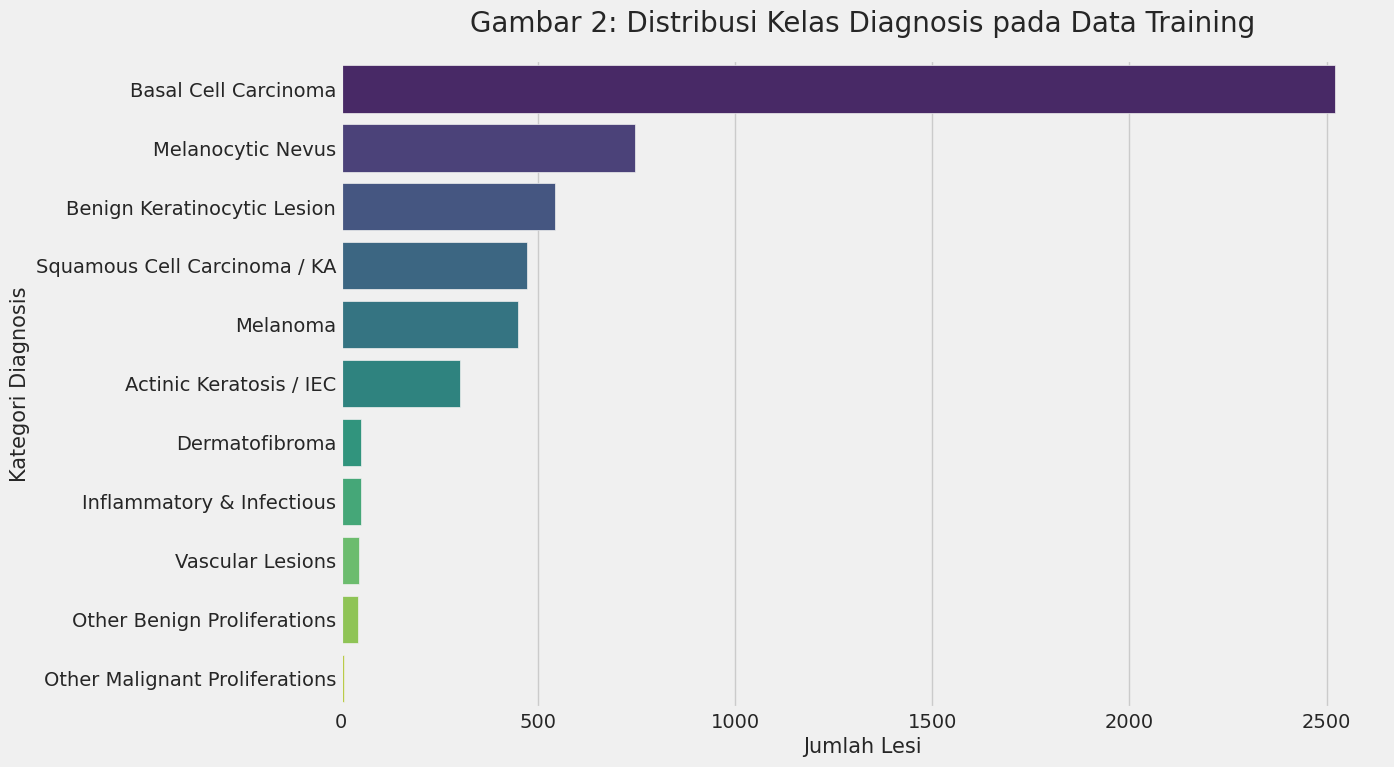

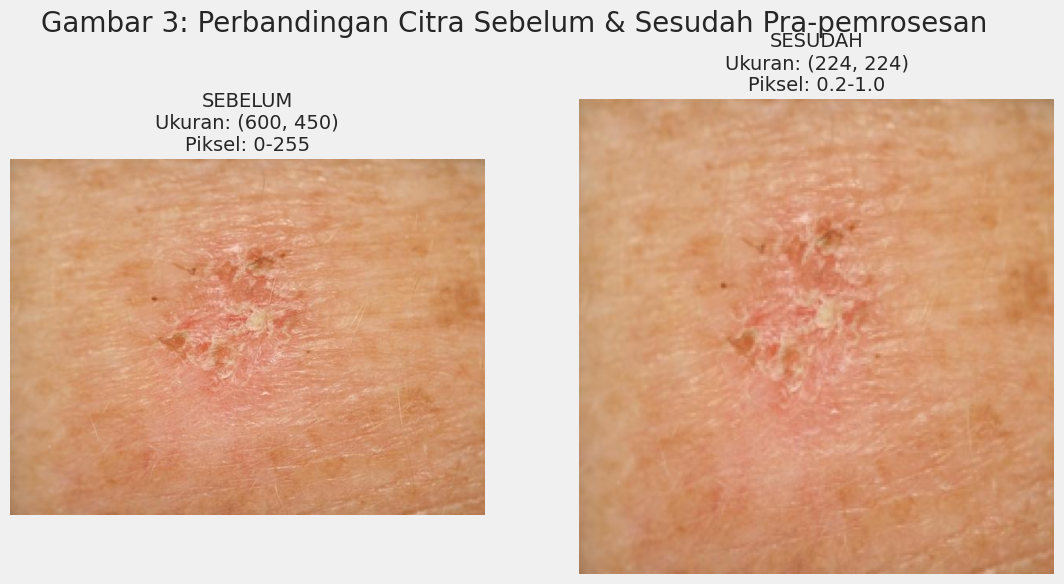

In [7]:
# ==============================================================================
# SEL 5: VISUALISASI DISTRIBUSI DAN PERBANDINGAN
# ==============================================================================

# === PERBAIKAN: Definisikan variabel yang dibutuhkan di awal sel ===
# Daftar kolom diagnosis
diagnosis_columns = ['AKIEC', 'BCC', 'BEN_OTH', 'BKL', 'DF', 'INF', 'MAL_OTH', 'MEL', 'NV', 'SCCKA', 'VASC']

# Pemetaan dari singkatan ke nama lengkap untuk label plot yang lebih jelas
diagnosis_mapping = {
    'AKIEC': 'Actinic Keratosis / IEC',
    'BCC': 'Basal Cell Carcinoma',
    'BEN_OTH': 'Other Benign Proliferations',
    'BKL': 'Benign Keratinocytic Lesion',
    'DF': 'Dermatofibroma',
    'INF': 'Inflammatory & Infectious',
    'MAL_OTH': 'Other Malignant Proliferations',
    'MEL': 'Melanoma',
    'NV': 'Melanocytic Nevus',
    'SCCKA': 'Squamous Cell Carcinoma / KA',
    'VASC': 'Vascular Lesions'
}
# ======================================================================

# --- 5.1 Visualisasi Distribusi Diagnosis (Gambar 2) ---
# Kode ini sekarang akan berjalan karena 'diagnosis_mapping' sudah ada
diagnosis_counts_mapped = df_train_truth[diagnosis_columns].sum().rename(index=diagnosis_mapping).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=diagnosis_counts_mapped.values, y=diagnosis_counts_mapped.index, palette="viridis", orient='h')
plt.title('Gambar 2: Distribusi Kelas Diagnosis pada Data Training', fontsize=20, pad=20)
plt.xlabel('Jumlah Lesi', fontsize=15); plt.ylabel('Kategori Diagnosis', fontsize=15)
plt.show()

# --- 5.2 Visualisasi Perbandingan Gambar (Gambar 3) ---
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = Image.open(image_path).convert('RGB')
        img_resized = img.resize(target_size)
        img_array = np.array(img_resized)
        normalized_array = img_array / 255.0
        return img, normalized_array
    except (FileNotFoundError, AttributeError):
        return None, None

# Ambil satu contoh gambar dari DataFrame yang sudah diproses
# Pastikan df_train_processed sudah ada dari sel sebelumnya
if 'df_train_processed' in globals() and not df_train_processed.empty:
    example_path = df_train_processed.iloc[5]['image_path_1'] 
    original_image, processed_image = preprocess_image(example_path)

    if original_image and (processed_image is not None):
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        axes[0].imshow(original_image)
        axes[0].set_title(f"SEBELUM\nUkuran: {original_image.size}\nPiksel: 0-255", fontsize=14)
        axes[0].axis('off')
        
        axes[1].imshow(processed_image)
        axes[1].set_title(f"SESUDAH\nUkuran: {processed_image.shape[:2]}\nPiksel: {processed_image.min():.1f}-{processed_image.max():.1f}", fontsize=14)
        axes[1].axis('off')
        
        plt.suptitle("Gambar 3: Perbandingan Citra Sebelum & Sesudah Pra-pemrosesan", fontsize=20, y=1.02)
        plt.show()
else:
    print("⚠️ DataFrame 'df_train_processed' belum dibuat. Jalankan sel sebelumnya terlebih dahulu.")

## MEMBUAT TABEL DISTRIBUSI DIAGNOSIS

In [15]:
# ==============================================================================
# TABEL PERBANDINGAN JUMLAH LESI VS GAMBAR (DENGAN PERSENTASE)
# ==============================================================================
print("\n" + "="*80)
print(" TABEL PERBANDINGAN LESI, GAMBAR, DAN PERSENTASENYA ".center(80, "="))
print("="*80 + "\n")

# Pastikan DataFrame df_train_full dan diagnosis_columns sudah ada
if 'df_train_full' not in globals() or 'diagnosis_columns' not in globals():
    print("❌ ERROR: DataFrame 'df_train_full' belum dibuat. Jalankan sel-sel sebelumnya.")
else:
    # 1. Siapkan dictionary untuk menyimpan hasil
    lesion_vs_image_counts = {}
    for disease in diagnosis_columns:
        df_disease = df_train_full[df_train_full[disease] == 1.0]
        lesion_vs_image_counts[disease] = {
            'Jumlah Lesi': df_disease['lesion_id'].nunique(),
            'Jumlah Gambar': len(df_disease)
        }

    # 2. Buat DataFrame dari hasil
    summary_df = pd.DataFrame.from_dict(lesion_vs_image_counts, orient='index')
    
    # 3. Tambahkan baris Total
    total_row = {
        'Jumlah Lesi': summary_df['Jumlah Lesi'].sum(),
        'Jumlah Gambar': summary_df['Jumlah Gambar'].sum()
    }
    summary_df.loc['Total'] = total_row
    summary_df = summary_df.astype(int)

    # === PENAMBAHAN PERSENTASE ===
    # 4. Hitung dan tambahkan kolom persentase
    total_lesions_sum = summary_df.loc['Total', 'Jumlah Lesi']
    total_images_sum = summary_df.loc['Total', 'Jumlah Gambar']
    
    summary_df['Persentase Lesi'] = (summary_df['Jumlah Lesi'] / total_lesions_sum * 100).apply(lambda x: f"{x:.2f}%")
    summary_df['Persentase Gambar'] = (summary_df['Jumlah Gambar'] / total_images_sum * 100).apply(lambda x: f"{x:.2f}%")
    # ============================

    # 5. Gunakan nama diagnosis lengkap untuk nama baris
    if 'diagnosis_mapping' in globals():
        summary_df = summary_df.rename(index=diagnosis_mapping)

    # 6. Tampilkan tabel
    print("Tabel Perbandingan Jumlah Lesi, Jumlah Gambar, dan Persentasenya per Kategori:")
    display(summary_df[['Jumlah Lesi', 'Persentase Lesi', 'Jumlah Gambar', 'Persentase Gambar']])


============== TABEL PERBANDINGAN LESI, GAMBAR, DAN PERSENTASENYA ==============

Tabel Perbandingan Jumlah Lesi, Jumlah Gambar, dan Persentasenya per Kategori:


,Jumlah Lesi,Persentase Lesi,Jumlah Gambar,Persentase Gambar
Actinic Keratosis / IEC,303,5.78%,606,5.78%
Basal Cell Carcinoma,2522,48.13%,5044,48.13%
Other Benign Proliferations,44,0.84%,88,0.84%
Benign Keratinocytic Lesion,544,10.38%,1088,10.38%
Dermatofibroma,52,0.99%,104,0.99%
Inflammatory & Infectious,50,0.95%,100,0.95%
Other Malignant Proliferations,9,0.17%,18,0.17%
Melanoma,450,8.59%,900,8.59%
Melanocytic Nevus,746,14.24%,1492,14.24%
Squamous Cell Carcinoma / KA,473,9.03%,946,9.03%


In [ ]:
# ==============================================================================
# TABEL DISTRIBUSI DIMENSI GAMBAR (DENGAN PERSENTASE)
# ==============================================================================
print("\n" + "="*60)
print(" ANALISIS DIMENSI GAMBAR TRAINING ".center(60, "="))
print("="*60 + "\n")

# Pastikan variabel 'all_train_images' sudah ada
if 'all_train_images' not in globals():
    all_train_images = glob.glob(os.path.join(train_img_path, '*', '*.jpg'))

image_dimensions = []
print("Menganalisis dimensi setiap gambar...")

# 1. Loop melalui semua path gambar untuk mendapatkan ukurannya
for image_path in all_train_images:
    try:
        with Image.open(image_path) as img:
            image_dimensions.append(img.size) # .size mengembalikan (lebar, tinggi)
    except Exception as e:
        print(f"Tidak dapat membaca gambar: {image_path} - Error: {e}")
print("Analisis dimensi selesai.")

# 2. Hitung frekuensi setiap dimensi
dimension_counts = pd.Series(image_dimensions).value_counts()

# 3. Buat DataFrame untuk menampilkan hasilnya
df_dimensions = pd.DataFrame({
    'Dimensi (Lebar x Tinggi)': [f"{dim[0]}x{dim[1]}" for dim in dimension_counts.index],
    'Jumlah Gambar': dimension_counts.values
})

# 4. Hitung dan tambahkan kolom persentase
total_images = len(image_dimensions)
df_dimensions['Persentase'] = (df_dimensions['Jumlah Gambar'] / total_images * 100).apply(lambda x: f"{x:.2f}%")

# 5. Tampilkan tabel distribusi dimensi
print("\nTabel Distribusi Ukuran (Dimensi) Gambar pada Data Training:")
display(df_dimensions)


============= ANALISIS DIMENSI GAMBAR TRAINING =============

Menganalisis dimensi setiap gambar...
Analisis dimensi selesai.

Tabel Distribusi Ukuran (Dimensi) Gambar pada Data Training:


,Dimensi (Lebar x Tinggi),Jumlah Gambar,Persentase
0,600x450,10480,100.00%


## Menyimpan Hasil Akhir


In [ ]:
# ==============================================================================
# MENYIMPAN HASIL AKHIR (KE FOLDER TERPISAH)
# ==============================================================================
# Pada versi ini, kita akan menyimpan file yang sudah diproses ke folder terpisah
# bernama 'processed_data' agar tidak tercampur dengan data mentah di 'dataset'.

# === PERBAIKAN: Tentukan folder output baru ===
# Path '../processed_data/' berarti "naik satu level dari folder 'notebook',
# lalu masuk ke folder 'processed_data'".
OUTPUT_PATH = "../dataset/processed_data/"

# Perintah ini akan membuat folder 'processed_data' secara otomatis jika belum ada.
os.makedirs(OUTPUT_PATH, exist_ok=True)
print(f"Folder output '{os.path.abspath(OUTPUT_PATH)}' telah disiapkan.")
# ============================================

# Tentukan path lengkap untuk file output di dalam folder baru
train_output_path = os.path.join(OUTPUT_PATH, 'train_processed.csv')
test_output_path = os.path.join(OUTPUT_PATH, 'test_processed.csv')

# Menyimpan DataFrame ke lokasi baru
df_train_processed.to_csv(train_output_path, index=False)
df_test_processed.to_csv(test_output_path, index=False)

print(f"\n✅ DataFrame yang telah diproses berhasil disimpan di folder baru:")
print(f"   - {train_output_path}")
print(f"   - {test_output_path}")

Folder output '/mnt/d/PROJECT/Deteksi Otomatis Kanker Kulit Menggunakan Citra Multimodal/dataset/processed_data' telah disiapkan.

✅ DataFrame yang telah diproses berhasil disimpan di folder baru:
   - ../dataset/processed_data/train_processed.csv
   - ../dataset/processed_data/test_processed.csv
